In [2]:
%matplotlib inline
import altair as alt
import pandas as pd
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
df = pd.read_csv('abalone.data', names=['Sex','Length',
                                        'Diameter','Height',
                                        'Whole weight', 'Shucked weight', 
                                        'Viscera weight', 'Shell weight', 
                                        'Rings'])

In [13]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     M   0.455     0.365   0.095        0.5140          0.2245   
1     M   0.350     0.265   0.090        0.2255          0.0995   
2     F   0.530     0.420   0.135        0.6770          0.2565   
3     M   0.440     0.365   0.125        0.5160          0.2155   
4     I   0.330     0.255   0.080        0.2050          0.0895   
5     I   0.425     0.300   0.095        0.3515          0.1410   
6     F   0.530     0.415   0.150        0.7775          0.2370   
7     F   0.545     0.425   0.125        0.7680          0.2940   
8     M   0.475     0.370   0.125        0.5095          0.2165   
9     F   0.550     0.440   0.150        0.8945          0.3145   
10    F   0.525     0.380   0.140        0.6065          0.1940   
11    M   0.430     0.350   0.110        0.4060          0.1675   
12    M   0.490     0.380   0.135        0.5415          0.2175   
13    F   0.535     0.405   0.145        0.6845          0.2725   
14    F   0.470     0.355   0.100        0.4755          0.1675   
15    M   0.500     0.400   0.130        0.6645          0.2580   
16    I   0.355     0.280   0.085        0.2905          0.0950   
17    F   0.440     0.340   0.100        0.4510          0.1880   
18    M   0.365     0.295   0.080        0.2555          0.0970   
19    M   0.450     0.320   0.100        0.3810          0.1705   
20    M   0.355     0.280   0.095        0.2455          0.0955   
21    I   0.380     0.275   0.100        0.2255          0.0800   
22    F   0.565     0.440   0.155        0.9395          0.4275   
23    F   0.550     0.415   0.135        0.7635          0.3180   
24    F   0.615     0.480   0.165        1.1615          0.5130   
25    F   0.560     0.440   0.140        0.9285          0.3825   
26    F   0.580     0.450   0.185        0.9955          0.3945   
27    M   0.590     0.445   0.140        0.9310          0.3560   
28    M   0.605     0.475   0.180        0.9365          0.3940   
29    M   0.575     0.425   0.140        0.8635          0.3930   
..   ..     ...       ...     ...           ...             ...   
470   F   0.530     0.440   0.135        0.7835          0.3130   
471   F   0.515     0.405   0.120        0.6460          0.2895   
472   I   0.430     0.340   0.120        0.3575          0.1510   
473   F   0.520     0.405   0.120        0.6270          0.2645   
474   F   0.545     0.415   0.160        0.7715          0.2720   
475   M   0.530     0.415   0.175        0.7395          0.2610   
476   F   0.465     0.350   0.115        0.4210          0.1565   
477   M   0.665     0.540   0.175        1.3470          0.4955   
478   M   0.735     0.590   0.225        1.7560          0.6370   
479   M   0.660     0.545   0.185        1.3200          0.5305   
480   F   0.700     0.585   0.185        1.8075          0.7055   
481   M   0.575     0.400   0.155        0.9325          0.3605   
482   M   0.570     0.465   0.125        0.8490          0.3785   
483   F   0.580     0.460   0.150        0.9955          0.4290   
484   M   0.630     0.480   0.145        1.0115          0.4235   
485   F   0.585     0.465   0.140        0.9080          0.3810   
486   M   0.550     0.450   0.130        0.9200          0.3780   
487   F   0.625     0.515   0.150        1.2415          0.5235   
488   M   0.540     0.420   0.135        0.8075          0.3485   
489   F   0.570     0.455   0.165        1.0595          0.4400   
490   M   0.590     0.455   0.145        1.0730          0.4750   
491   M   0.580     0.460   0.130        0.9210          0.3570   
492   F   0.655     0.510   0.155        1.2895          0.5345   
493   M   0.655     0.530   0.175        1.2635          0.4860   
494   M   0.625     0.500   0.195        1.3690          0.5875   
495   F   0.625     0.500   0.150        0.9530          0.3445   
496   F   0.640     0.520   0.175        1.2480          0.4245   
497   F   0.605     0.485   0.165        1.0105    

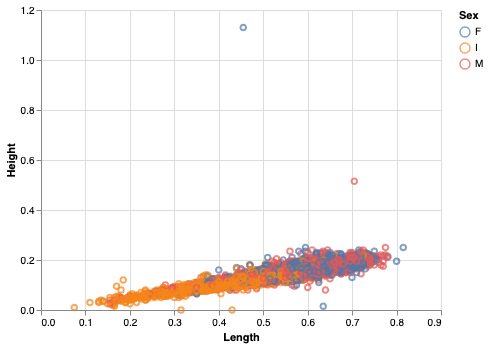

In [4]:
alt.Chart(df).mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex'
)



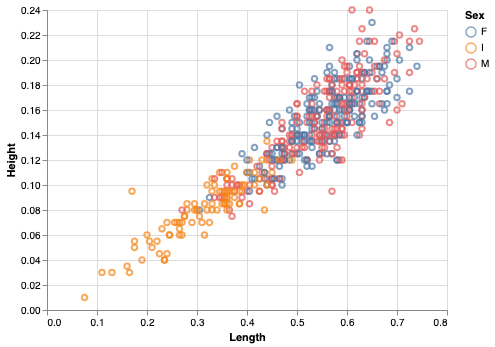

In [15]:
alt.Chart(df).mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex'
)

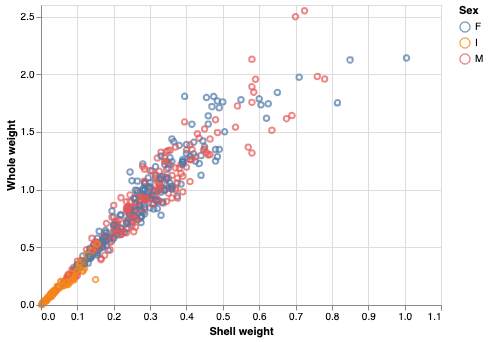

In [16]:
alt.Chart(df).mark_point().encode(
    x='Shell weight:Q',
    y='Whole weight:Q',
    color='Sex'
)

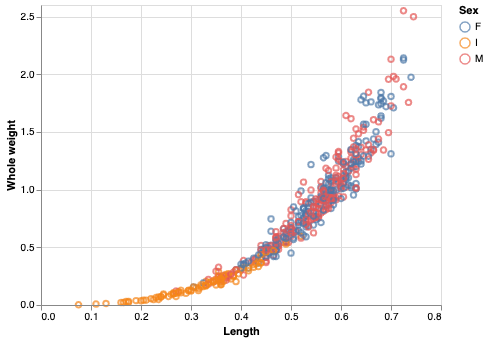

In [17]:
alt.Chart(df).mark_point().encode(
    x='Length:Q',
    y='Whole weight:Q',
    color='Sex'
)

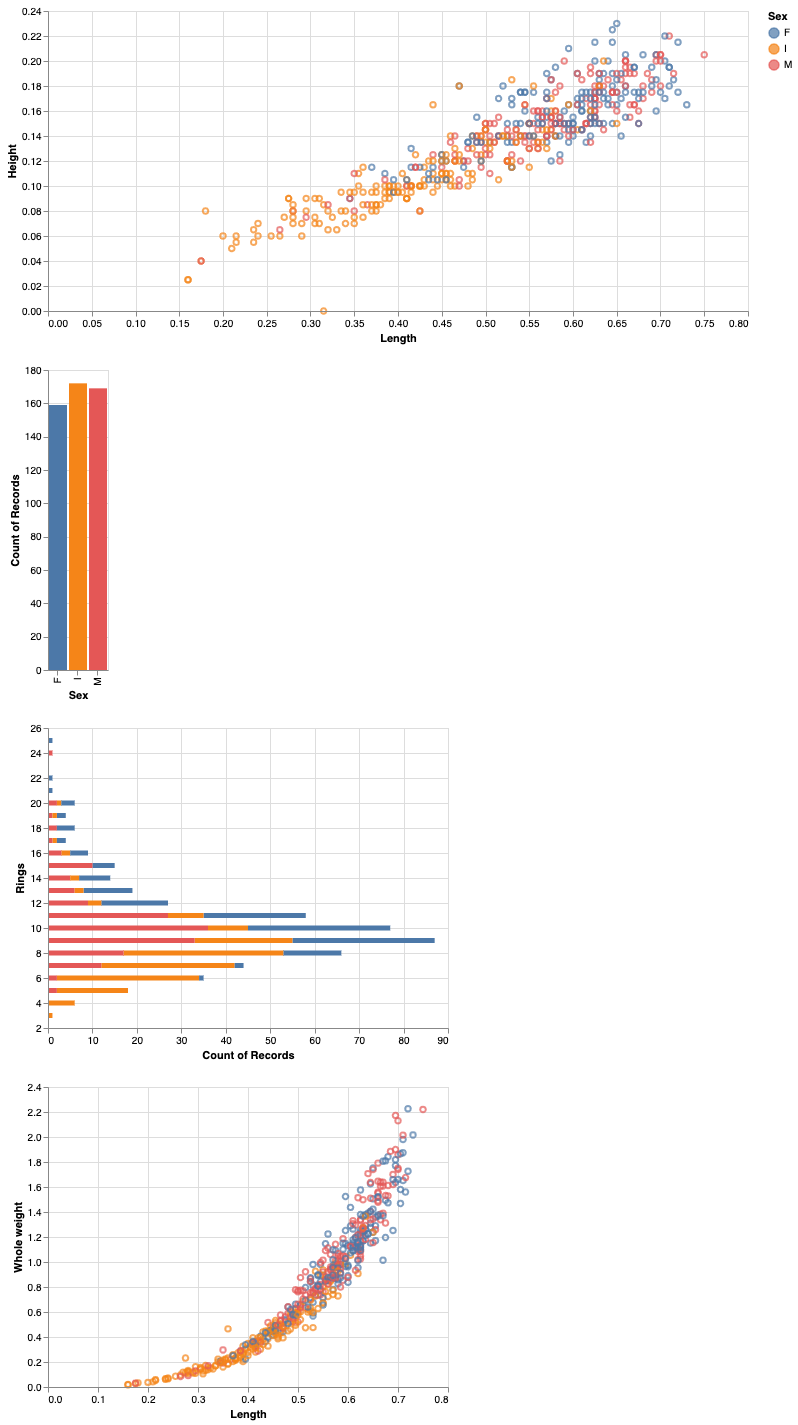

In [6]:
brush = alt.selection(type='interval')

# the top scatterplot
mainBar = alt.Chart().mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=700
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
            y='count()',
            color='Sex',
            x='Sex:N'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

bars2 = alt.Chart().mark_bar().encode(
            y='Rings:Q',
            color='Sex:N',
            x='count()'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter = alt.Chart(df).mark_point().encode(
                x='Length:Q',
                y='Whole weight:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

chart = alt.vconcat(mainBar, bars, bars2, scatter, data=df)
chart.transform_sample(sample=500)

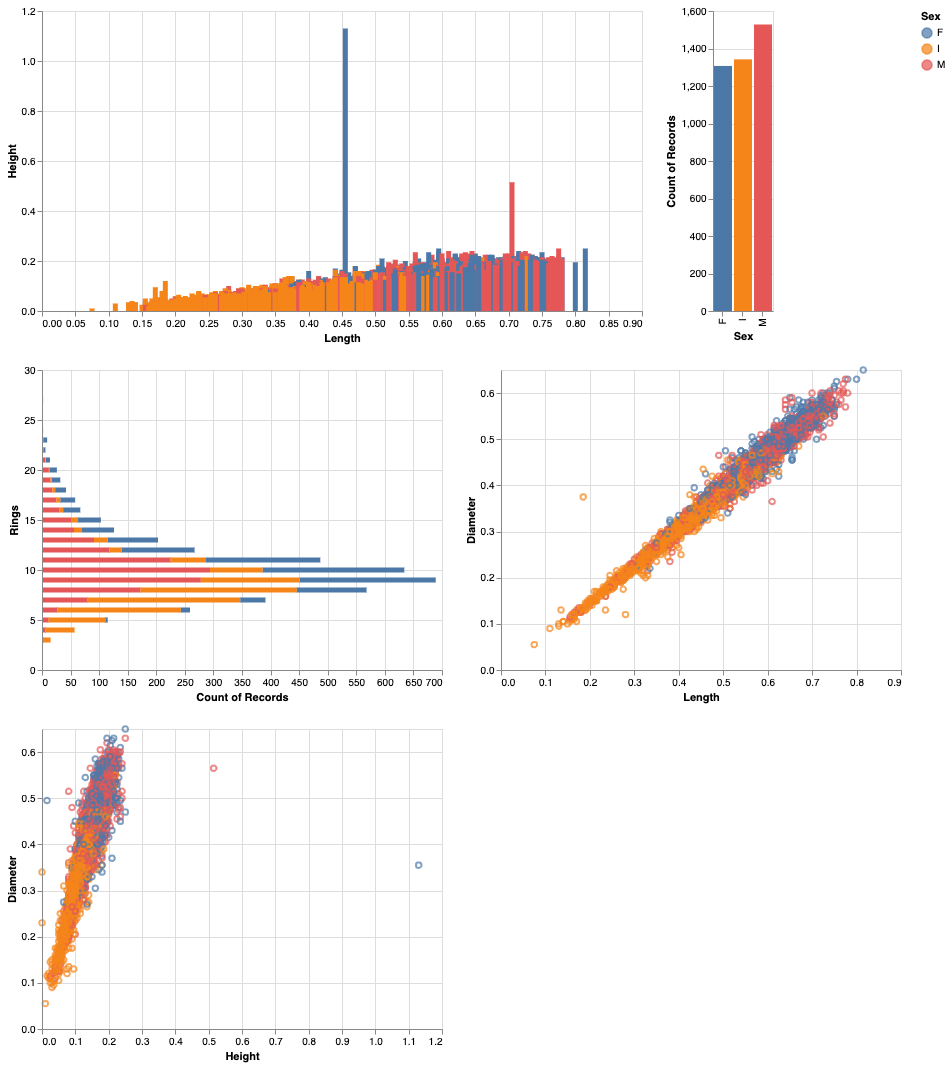

In [7]:


brush = alt.selection_interval(encodings=['x'])

# the top scatterplot
mainBar = alt.Chart().mark_bar().encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=600
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
            y='count()',
            color='Sex',
            x='Sex:N'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

bars2 = alt.Chart().mark_bar().encode(
            y='Rings:Q',
            color='Sex:N',
            x='count()'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter = alt.Chart(df).mark_point().encode(
                x='Length:Q',
                y='Whole weight:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter = alt.Chart(df).mark_point().encode(
                x='Length:Q',
                y='Diameter:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter2 = alt.Chart(df).mark_point().encode(
                x='Height:Q',
                y='Diameter:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

chart = alt.vconcat(mainBar | bars, bars2 | scatter ,scatter2, data=df)
chart

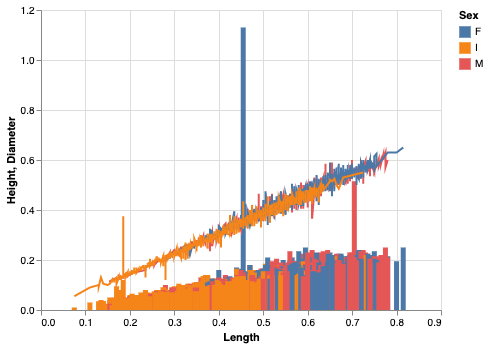

In [10]:
mainBar = alt.Chart(df).mark_bar().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex:N',
)

chart2 = alt.Chart(df).mark_line().encode(
            y='Diameter:Q',
            color='Sex',
            x='Length:Q'
        )

(mainBar + chart2)